In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras

In [5]:
digit_mnist = keras.datasets.mnist


In [6]:
(X_train_full, Y_train_full), (X_test, Y_test) = digit_mnist.load_data()

In [7]:
class_name =["0", " 1", " 2", "3", "4","5", "6", "7", "8","9"]

In [8]:

X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

Data normalization

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test_n

In [11]:
np.random.seed(42)
tf.random.set_seed(42)


create model cnn

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters= 32, kernel_size= (3,3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               1081800   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
Total params: 1,102,220
Trainable params: 1,102,220
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
model_history = model.fit(X_train, Y_train, epochs=60, batch_size= 64,
                          validation_data=(X_valid, Y_valid))


Epoch 1/60
860/860 [==============================] - 29s 33ms/step - loss: 0.7625 - accuracy: 0.8089 - val_loss: 0.3094 - val_accuracy: 0.9124
Epoch 2/60
860/860 [==============================] - 28s 33ms/step - loss: 0.3045 - accuracy: 0.9110 - val_loss: 0.2584 - val_accuracy: 0.9260
Epoch 3/60
860/860 [==============================] - 29s 33ms/step - loss: 0.2529 - accuracy: 0.9265 - val_loss: 0.2071 - val_accuracy: 0.9402
Epoch 4/60
860/860 [==============================] - 29s 33ms/step - loss: 0.2141 - accuracy: 0.9367 - val_loss: 0.1842 - val_accuracy: 0.9470
Epoch 5/60
860/860 [==============================] - 28s 33ms/step - loss: 0.1857 - accuracy: 0.9453 - val_loss: 0.1645 - val_accuracy: 0.9520
Epoch 6/60
860/860 [==============================] - 28s 33ms/step - loss: 0.1647 - accuracy: 0.9521 - val_loss: 0.1485 - val_accuracy: 0.9600
Epoch 7/60
860/860 [==============================] - 29s 33ms/step - loss: 0.1472 - accuracy: 0.9565 - val_loss: 0.1285 - val_accuracy:

In [18]:

model_history.history

{'accuracy': [0.8089454770088196,
  0.9109818339347839,
  0.9264909029006958,
  0.9367091059684753,
  0.9453272819519043,
  0.9520909190177917,
  0.9564727544784546,
  0.960418164730072,
  0.9644363522529602,
  0.9665091037750244,
  0.9691818356513977,
  0.9717090725898743,
  0.9727272987365723,
  0.9747090935707092,
  0.9761454463005066,
  0.9772363901138306,
  0.9786909222602844,
  0.9798908829689026,
  0.9808545708656311,
  0.9811272621154785,
  0.982236385345459,
  0.9827272891998291,
  0.9837272763252258,
  0.984000027179718,
  0.9849091172218323,
  0.985872745513916,
  0.986018180847168,
  0.9861636161804199,
  0.9868000149726868,
  0.9876182079315186,
  0.987927258014679,
  0.9881818294525146,
  0.9888727068901062,
  0.9890000224113464,
  0.9894363880157471,
  0.9903272986412048,
  0.9901818037033081,
  0.9910545349121094,
  0.9911454319953918,
  0.9916545748710632,
  0.9919090867042542,
  0.9924363493919373,
  0.9927272796630859,
  0.9931636452674866,
  0.9932727217674255,
  0.

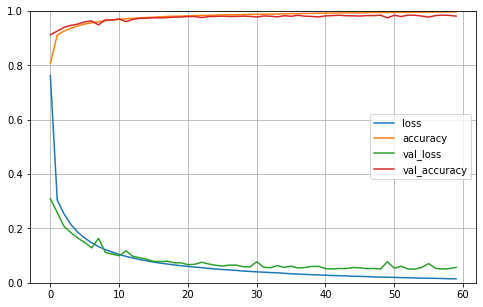

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [20]:
ev = model.evaluate(X_test_n, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0620 - accuracy: 0.9815


In [21]:
ev

[0.062020208686590195, 0.9815000295639038]

In [22]:
X_new =X_test[:3]

In [23]:
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)

In [24]:

Y_test[:3]

array([7, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


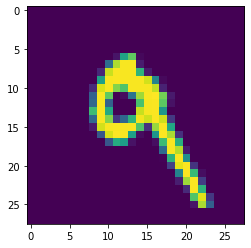

In [31]:
print(plt.imshow(X_test[7].reshape((28, 28))))